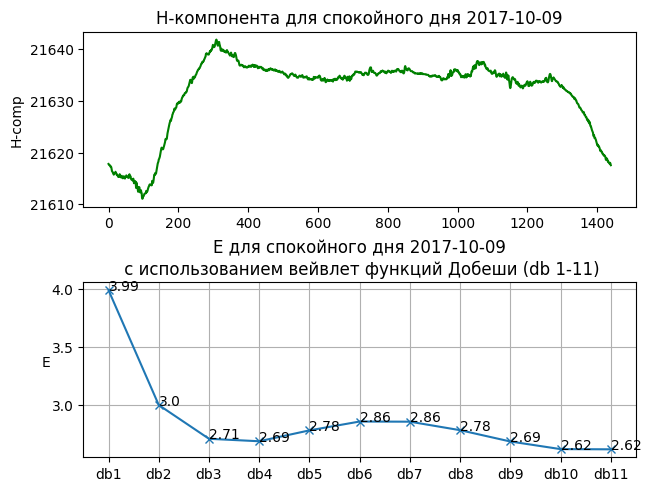

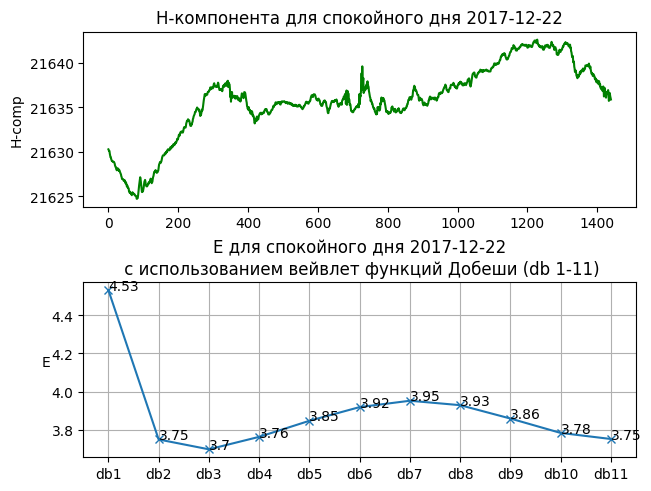

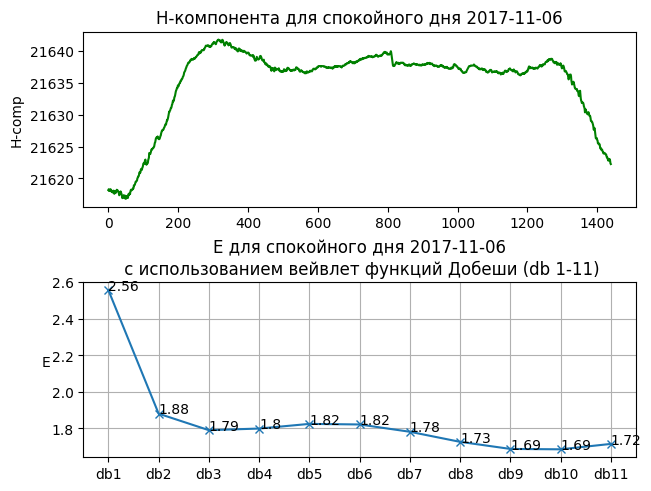

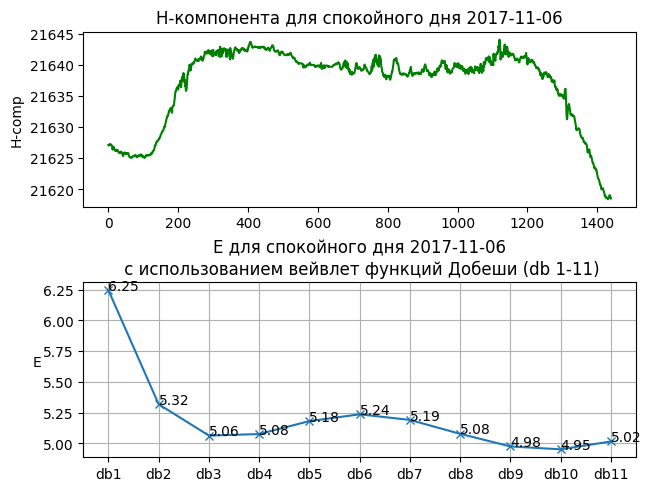

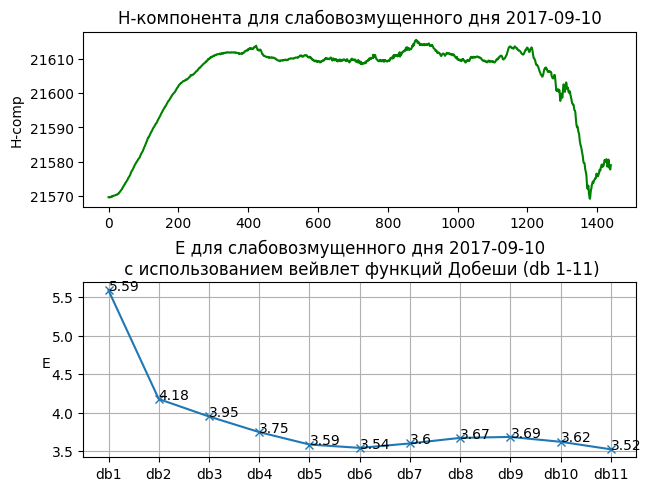

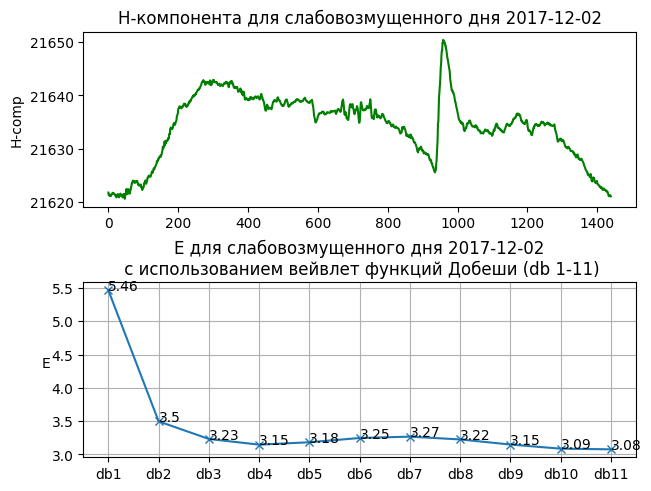

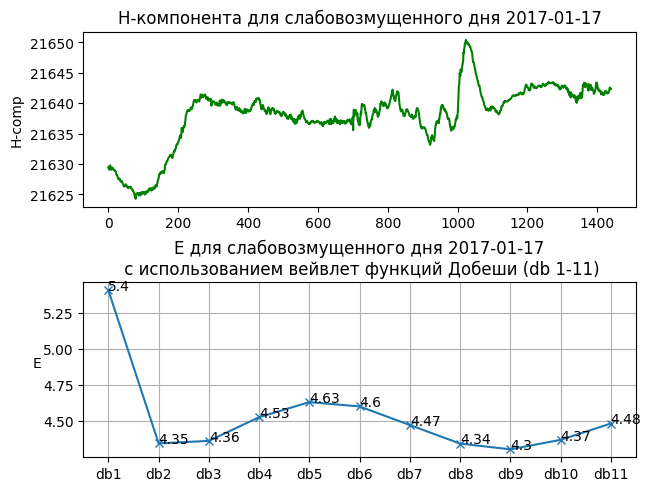

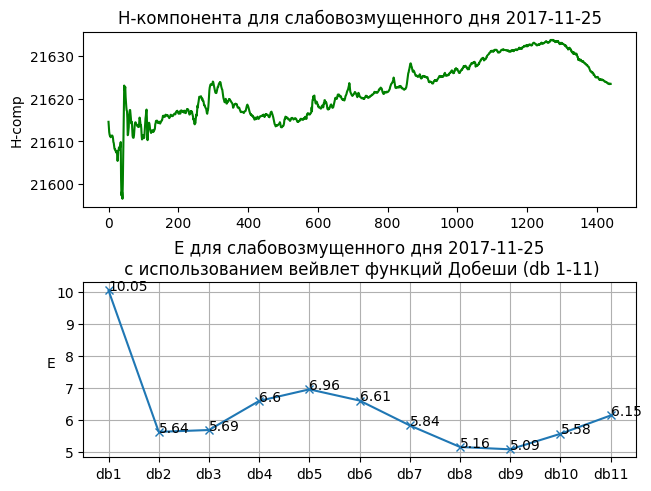

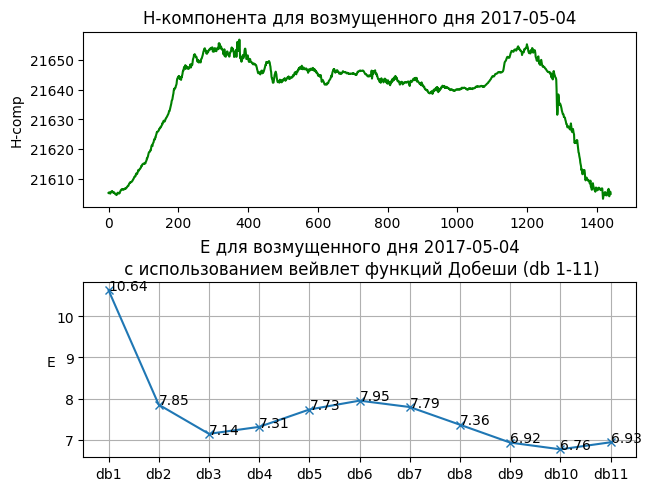

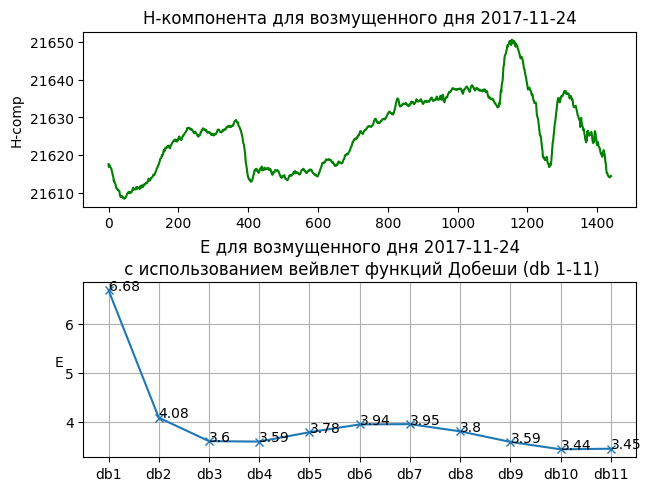

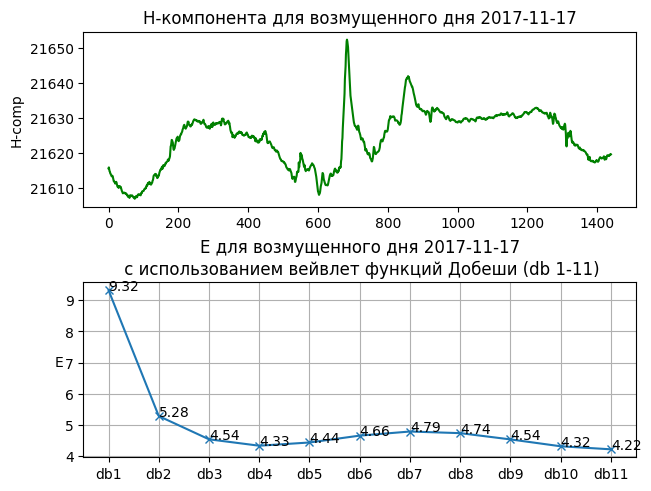

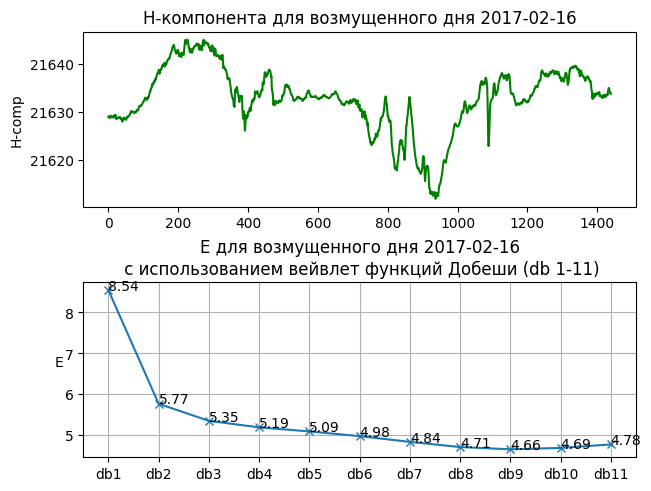

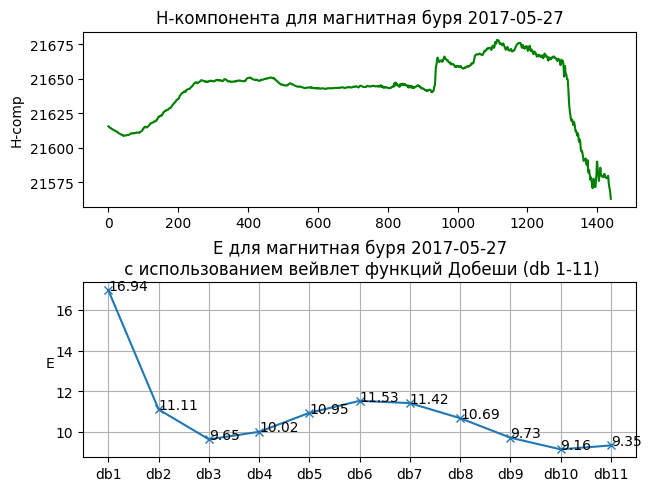

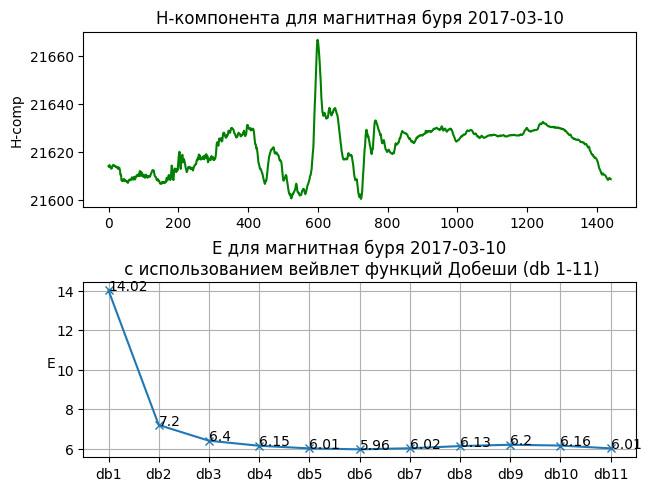

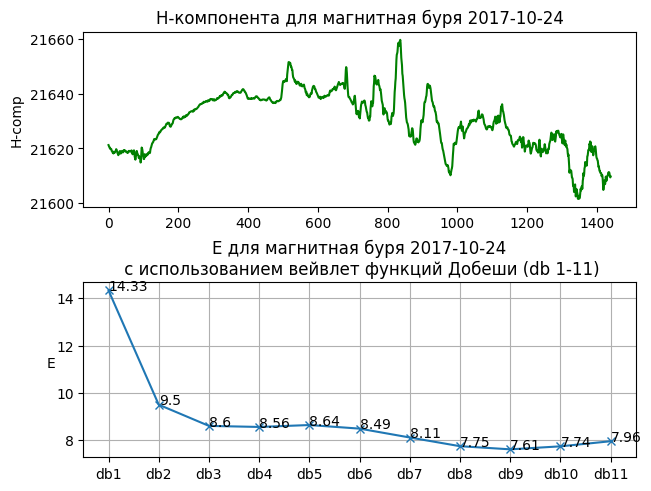

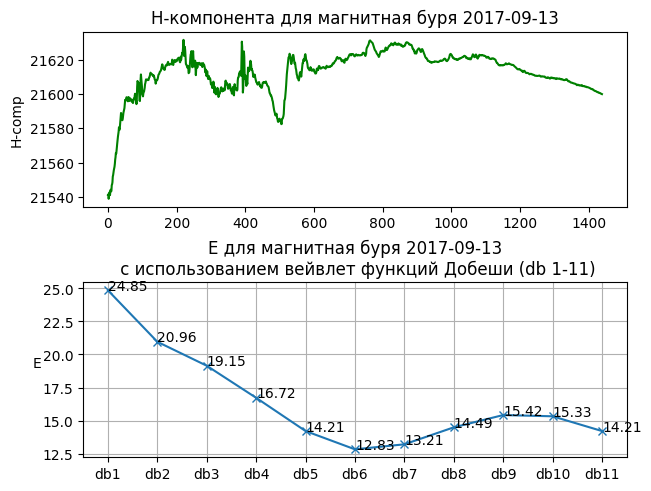

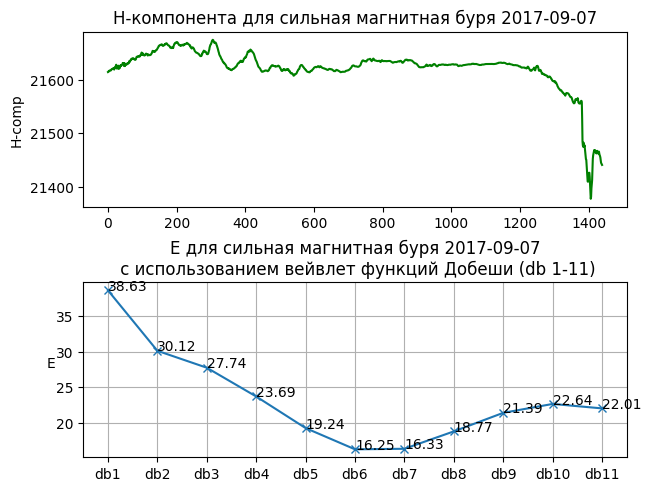

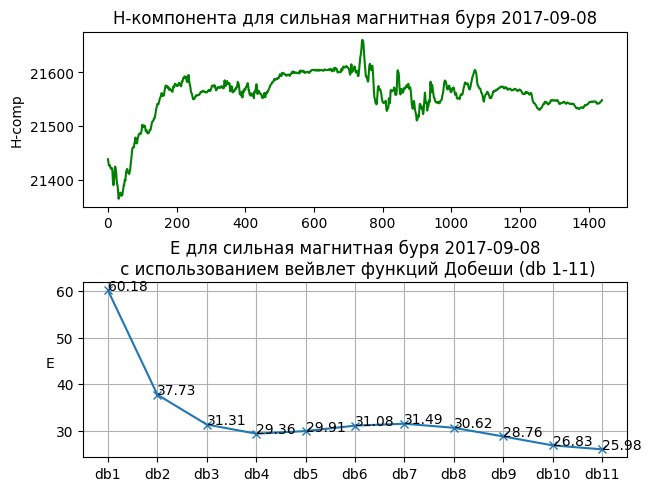

In [33]:
import pywt
import pet2017 as pet
import matplotlib.pyplot as plot
import numpy as np


'''
[A2, D1] = pywt.dwt(quiet1, 'db1')
[A2, D2] = pywt.dwt(A2, 'db1')

D1 *= 0

A = pywt.idwt(A2, D2, 'db1')

quiet1_0 = pywt.idwt(A, D1, 'db1')

fig, axs = plot.subplot_mosaic([['c-0']],
                              constrained_layout=True)

#plot.rcParams['figure.dpi'] = 170
plot.rcParams['font.size'] = 5
plot.subplots_adjust(hspace=1)

axs['c-0'].set_title("Исходный сигнал")
#axs['c-1-1'].set_title("Восстановленный сигнал")

axs['c-0'].plot(quiet1, linewidth=0.4)
axs['c-0'].plot(quiet1_0, linewidth=0.4)

E1 = np.linalg.norm(quiet1 - quiet1_0)
'''
func_names = ['db1','db2','db3','db4','db5','db6','db7','db8','db9','db10','db11']

def CalcEWithDwt(signal, wavelet):
    [A2, D1] = pywt.dwt(signal, wavelet=wavelet)
    [A2, D2] = pywt.dwt(A2, wavelet=wavelet)
    D1 *= 0
    A = pywt.idwt(A2, D2, wavelet=wavelet)
    length = min(len(A),len(D1))
    signal_reconstruct = pywt.idwt(A[:length], D1[:length], wavelet=wavelet)
    E = np.linalg.norm(signal - signal_reconstruct)
    return (E, signal_reconstruct)

def GetEArray(signal):
    [E1, sr1] = CalcEWithDwt(signal, 'db1')
    [E2, sr2] = CalcEWithDwt(signal, 'db2')
    [E3, sr3] = CalcEWithDwt(signal, 'db3')
    [E4, sr4] = CalcEWithDwt(signal, 'db4')
    [E5, sr5] = CalcEWithDwt(signal, 'db5')
    [E6, sr6] = CalcEWithDwt(signal, 'db6')
    [E7, sr7] = CalcEWithDwt(signal, 'db7')
    [E8, sr8] = CalcEWithDwt(signal, 'db8')
    [E9, sr9] = CalcEWithDwt(signal, 'db9')
    [E10, sr10] = CalcEWithDwt(signal, 'db10')
    [E11, sr11] = CalcEWithDwt(signal, 'db11')
    return [[E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11], [sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,sr10,sr11]]


def Plot_result(signal, wfuncnames_names, E_array, date):
    plot.show()
    fig, axs = plot.subplot_mosaic([['c-00'], ['c-1']],
                              constrained_layout=True)
    


    axs['c-1'].plot(wfuncnames_names, E_array, marker="x")
    axs['c-1'].grid()
    axs['c-1'].set_title('E для %(date)s\n с использованием вейвлет функций Добеши (db 1-11)'%{"date":date})
    axs['c-1'].set_ylabel("E", rotation=0)
    axs['c-00'].plot(signal, color="green")
    axs['c-00'].set_title('H-компонента для %(date)s'%{"date":date})
    axs['c-00'].set_ylabel("H-comp")
    for x,y,text in zip(wfuncnames_names, E_array, np.around(E_array,2)):
      axs['c-1'].text(x,y,text)

quiet1 = [*pet.data_by_month('2017-10-09')["PETH"]]
quiet2 = [*pet.data_by_month('2017-12-22')["PETH"]]
quiet3 = [*pet.data_by_month('2017-11-06')["PETH"]]
quiet4 = [*pet.data_by_month('2017-02-14')["PETH"]]

low1 = [*pet.data_by_month('2017-09-10')["PETH"]]
low2 = [*pet.data_by_month('2017-12-02')["PETH"]]
low3 = [*pet.data_by_month('2017-01-17')["PETH"]]
low4 = [*pet.data_by_month('2017-11-25')["PETH"]]

medium1 = [*pet.data_by_month('2017-05-04')["PETH"]]
medium2 = [*pet.data_by_month('2017-11-24')["PETH"]]
medium3 = [*pet.data_by_month('2017-11-17')["PETH"]]
medium4 = [*pet.data_by_month('2017-02-16')["PETH"]]

storm1 = [*pet.data_by_month('2017-05-27')["PETH"]]
storm2 = [*pet.data_by_month('2017-03-10')["PETH"]]
storm3 = [*pet.data_by_month('2017-10-24')["PETH"]]
storm4 = [*pet.data_by_month('2017-09-13')["PETH"]]

hstorm1 = [*pet.data_by_month('2017-09-07')["PETH"]]
hstorm2 = [*pet.data_by_month('2017-09-08')["PETH"]]

[Equite, RSquite] = GetEArray(quiet1)
[Equite2, RSquite2] = GetEArray(quiet2)
[Equite3, RSquite3] = GetEArray(quiet3)
[Equite4, RSquite4] = GetEArray(quiet4)

[Elow1, RSlow1] = GetEArray(low1)
[Elow2, RSlow2] = GetEArray(low2)
[Elow3, RSlow3] = GetEArray(low3)
[Elow4, RSlow4] = GetEArray(low4)

[Emedium1, RSmedium1] = GetEArray(medium1)
[Emedium2, RSmedium2] = GetEArray(medium2)
[Emedium3, RSmedium3] = GetEArray(medium3)
[Emedium4, RSmedium4] = GetEArray(medium4)

[Estorm1, RSstorm1] = GetEArray(storm1)
[Estorm2, RSstorm2] = GetEArray(storm2)
[Estorm3, RSstorm3] = GetEArray(storm3)
[Estorm4, RSstorm4] = GetEArray(storm4)


[Ehstorm1, RShstorm1] = GetEArray(hstorm1)
[Ehstorm2, RShstorm2] = GetEArray(hstorm2)

Plot_result(quiet1, func_names, Equite, "спокойного дня 2017-10-09")
Plot_result(quiet2, func_names, Equite2, "спокойного дня 2017-12-22")
Plot_result(quiet3, func_names, Equite3, "спокойного дня 2017-11-06")
Plot_result(quiet4, func_names, Equite4, "спокойного дня 2017-11-06")

Plot_result(low1, func_names, Elow1, "слабовозмущенного дня 2017-09-10")
Plot_result(low2, func_names, Elow2, "слабовозмущенного дня 2017-12-02")
Plot_result(low3, func_names, Elow3, "слабовозмущенного дня 2017-01-17")
Plot_result(low4, func_names, Elow4, "слабовозмущенного дня 2017-11-25")

Plot_result(medium1, func_names, Emedium1, "возмущенного дня 2017-05-04")
Plot_result(medium2, func_names, Emedium2, "возмущенного дня 2017-11-24")
Plot_result(medium3, func_names, Emedium3, "возмущенного дня 2017-11-17")
Plot_result(medium4, func_names, Emedium4, "возмущенного дня 2017-02-16")

Plot_result(storm1, func_names, Estorm1, "магнитная буря 2017-05-27")
Plot_result(storm2, func_names, Estorm2, "магнитная буря 2017-03-10")
Plot_result(storm3, func_names, Estorm3, "магнитная буря 2017-10-24")
Plot_result(storm4, func_names, Estorm4, "магнитная буря 2017-09-13")

Plot_result(hstorm1, func_names, Ehstorm1, "сильная магнитная буря 2017-09-07")
Plot_result(hstorm2, func_names, Ehstorm2, "сильная магнитная буря 2017-09-08")